In [1]:
from pathlib import Path
import pandas as pd

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
import pandas
from sklearn import tree
#import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
#pd.options.plotting.backend = "matplotlib" #Abändern des Plot Backends
pd.options.plotting.backend = "plotly"
#pd.options.mode.use_inf_as_na = True

In [2]:
path = Path().joinpath('technology', 'experiments', 'sonicMeasure', 'Pretests', 'data', 'RunsTControlled')

dataframes = []
for file in path.iterdir():
    if file.name.__contains__('10') and not file.name.startswith('._'):
        df = pd.read_csv(file, sep=',')

        df['timestamp'] = pd.to_datetime(df['timestamp'])

        df['deltatime'] = (df['timestamp'] - df['timestamp'].shift()).dt.total_seconds()
       
        if file.name.__contains__('1gL'):
            c = 1.0
        elif file.name.__contains__('0.5gL'):
            c = 0.5
        else:
            c = 0.0
        df['concentration'] = c

        df['deltatime'].fillna(df['deltatime'].mean(), inplace=True)

        df = df[df['temperature'].between(9.6, 10.4)] # filter stable temperature

        df['on-status'] = df['on-status'].map({'on':1, 'off':0})

        dataframes.append(df)
    
df = pd.concat(dataframes)
df.sample(10)

,timestamp,Urms,Irms,phase,frequency,on-status,temperature,deltatime,concentration
887,2021-06-21 16:05:26.208470,2829.0,2890.0,7425.0,2104,0,10.00,7.038612,0.0
2055,2021-06-21 18:23:15.749296,2828.0,2888.0,7426.0,2007,0,9.99,7.038791,0.0
613,2021-06-22 20:55:21.535079,23011.0,15676.0,14048.0,2110,1,10.11,7.022753,0.5
1959,2021-06-21 18:11:52.079304,2827.0,2886.0,7425.0,2137,0,10.00,7.022652,0.0
1587,2021-06-21 17:27:56.790518,2828.0,2888.0,7419.0,2105,0,10.05,7.134557,0.0
273,2021-06-22 20:15:17.401072,22374.0,20417.0,14878.0,2109,1,10.35,7.150801,0.5
1365,2021-06-21 17:01:45.324790,2828.0,2888.0,7420.0,2007,0,9.97,7.135016,0.0
718,2021-06-21 15:45:31.572898,25041.0,7889.0,9235.0,2007,1,9.96,7.038336,0.0
1472,2021-06-21 17:14:21.654946,2828.0,2890.0,7423.0,2097,0,10.07,7.038784,0.0
2075,2021-06-21 18:25:37.947928,2828.0,2887.0,7422.0,2077,0,10.01,7.038552,0.0


In [3]:
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))

# for i, c in enumerate(df['concentration'].unique()):
#     dff = df[df['concentration'] == c]
#     corr = dff[['Urms', 'Irms', 'phase', 'frequency', 'on-status','temperature']].corr()
#     ax[i].set_title(f'{c}g/L')
#     sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels=corr.columns.values, annot = True, ax = ax[i])

# plt.tight_layout()
plt.show()

In [4]:
# # Set new df
# df = df[df['on-status'] == 1]
# df.reset_index(drop=True, inplace=True)

In [5]:
# from sklearn.preprocessing import StandardScaler

# x1 = df[['Urms', 'Irms', 'phase', 'frequency', 'concentration']].copy() # define features
# x1_scaler = StandardScaler().fit(x1) # standardize features
# x1 = pd.DataFrame(x1_scaler.transform(x1), columns = x1.columns) # standardized data frame

# y1 = df['concentration'].copy()


In [6]:
# from sklearn.decomposition import PCA
# n_components = 5
# pca = PCA(n_components = n_components)
# principal_components = pca.fit_transform(x1)

# print(pca.get_covariance())
# pca.explained_variance_ratio_

In [7]:
# plt.figure(figsize=(5, 5))
# plt.bar(range(n_components), ( pca.explained_variance_ratio_ * 100 ), align='center', label='individual explained variance')
# plt.ylabel('Explained variance ratio [%]')
# plt.xlabel('Principal components')
# plt.tight_layout()
# plt.show()

In [8]:
# pca_components = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
# pca_components['concentration'] = y1.values
# fig = sns.pairplot(
#     pca_components,
#     hue='concentration',
#     palette = 'muted',
#     plot_kws ={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}) 
# plt.show(fig)

In [9]:
# plt.figure(figsize=(12, 10))
# sns.heatmap(
#     pca.components_,
#         yticklabels=[ f'PC{i+1}' for i in range(pca.n_components)],
#         xticklabels=list(x1.columns),
#         annot= True,
#     #  cbar_kws={"orientation": "horizontal"}
# )
# plt.tight_layout()
# plt.show()

In [10]:
# corr = df[['Urms', 'Irms', 'phase', 'frequency', 'on-status','temperature']].corr()
# plt.subplots(figsize=(15,10))
# sns.heatmap(corr, xticklabels = corr.columns.values,
#            yticklabels=corr.columns.values, annot = True)
# plt.show()

# Decision Tree

In [11]:
df = df[df['on-status']==1]
df.sample(10)

,timestamp,Urms,Irms,phase,frequency,on-status,temperature,deltatime,concentration
537,2021-06-24 13:46:06.681103,24928.0,10144.0,10429.0,2102,1,10.07,7.038895,1.0
371,2021-06-24 13:26:33.239429,24878.0,10174.0,10679.0,2102,1,10.16,7.038745,1.0
271,2021-06-24 13:14:46.355680,24884.0,11078.0,10522.0,2109,1,10.17,7.022664,1.0
525,2021-06-22 20:44:59.485403,24503.0,16739.0,10909.0,2097,1,9.93,7.022815,0.5
380,2021-06-24 13:27:36.860198,24831.0,10871.0,10736.0,2104,1,10.16,7.151007,1.0
513,2021-06-24 13:43:17.014314,24765.0,7870.0,12096.0,2077,1,10.05,7.022842,1.0
2517,2021-06-21 19:18:35.484216,24714.0,16933.0,10289.0,2110,1,10.00,7.135910,0.0
468,2021-06-24 13:37:59.022460,24425.0,16302.0,11553.0,2117,1,10.10,7.151080,1.0
1483,2021-06-21 17:15:39.561400,25001.0,11516.0,9990.0,2097,1,10.06,7.038926,0.0
406,2021-06-24 13:30:40.586712,24926.0,11201.0,10343.0,2106,1,10.13,7.037625,1.0


In [12]:
random_state = 69 # arbitrarily number for randomization
attributes = ['Urms', 'Irms', 'phase', 'frequency'] # column names for input data
categories = ['0g/L', '0.5g/L', '1g/L'] # category names for classification

x1 = df[attributes] # input data frame from attributes
y1 = df['concentration'].apply(lambda x: str(x) + 'g/L') # category data from categories

print(x1.sample(5, random_state=random_state), '\n') # show a random sample
print(y1.sample(5, random_state=random_state), '\n') # -

         Urms     Irms    phase  frequency
626   23367.0  13351.0  13533.0       2112
260   24874.0  10737.0  10631.0       2108
636   24039.0   9608.0  13674.0       2117
2291  24891.0  13901.0  10146.0       2105
1750  24792.0  15609.0  10218.0       2108 

626     0.5g/L
260     1.0g/L
636     0.5g/L
2291    0.0g/L
1750    0.0g/L
Name: concentration, dtype: object 



In [13]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

for index, (train_index, test_index) in enumerate(kf.split(x1, y1)):
    print(f'Fold:{index}, Train set: {len(train_index)}, Test set:{len(test_index)}')

Fold:0, Train set: 649, Test set:73
Fold:1, Train set: 649, Test set:73
Fold:2, Train set: 650, Test set:72
Fold:3, Train set: 650, Test set:72
Fold:4, Train set: 650, Test set:72
Fold:5, Train set: 650, Test set:72
Fold:6, Train set: 650, Test set:72
Fold:7, Train set: 650, Test set:72
Fold:8, Train set: 650, Test set:72
Fold:9, Train set: 650, Test set:72


In [14]:
tree_depth = 10
for val in range(1, tree_depth + 1):
    score = cross_val_score(tree.DecisionTreeClassifier(max_depth=val, random_state=69), x1, y1, cv=kf, scoring="accuracy")
    print(f'Average score( max_depth={val} ):\t\t{score.mean():.3f}\t\t{score.std():.3f}')

score = cross_val_score(tree.DecisionTreeClassifier(random_state=random_state, max_depth=7), x1, y1, cv=kf, scoring="accuracy")
print(f'\nScores for each fold are:\n{np.round(score*100, 1)} in %')
print(f'Average score: {score.mean():.3f}')

leaf_nodes = 15
for n in range(1, leaf_nodes + 1):
    score = cross_val_score(tree.DecisionTreeClassifier(max_leaf_nodes=n, random_state=69), x1, y1, cv=kf, scoring="accuracy")
    print(f'Average score( max_leaf_nodes={n} ):\t\t{score.mean():.3f}\t\t{score.std():.3f}')

score = cross_val_score(tree.DecisionTreeClassifier(random_state=random_state, max_leaf_nodes=11), x1, y1, cv=kf, scoring="accuracy")
print(f'\nScores for each fold are:\n{np.round(score*100, 1)} in %')
print(f'Average score: {score.mean():.3f}')

Average score( max_depth=1 ):		0.589		0.023
Average score( max_depth=2 ):		0.778		0.037
Average score( max_depth=3 ):		0.841		0.043
Average score( max_depth=4 ):		0.936		0.030
Average score( max_depth=5 ):		0.974		0.007
Average score( max_depth=6 ):		0.978		0.011
Average score( max_depth=7 ):		0.989		0.010
Average score( max_depth=8 ):		0.989		0.010
Average score( max_depth=9 ):		0.989		0.010
Average score( max_depth=10 ):		0.989		0.010

Scores for each fold are:
[ 98.6  97.3 100.  100.   98.6 100.   98.6  97.2  98.6 100. ] in %
Average score: 0.989
Average score( max_leaf_nodes=1 ):		nan		nan
Average score( max_leaf_nodes=2 ):		0.589		0.023
Average score( max_leaf_nodes=3 ):		0.788		0.033
Average score( max_leaf_nodes=4 ):		0.778		0.037
Average score( max_leaf_nodes=5 ):		0.789		0.051
Average score( max_leaf_nodes=6 ):		0.835		0.032
Average score( max_leaf_nodes=7 ):		0.889		0.028
Average score( max_leaf_nodes=8 ):		0.921		0.034
Average score( max_leaf_nodes=9 ):		0.939		0.020
Average

['0.0g/L' '0.5g/L' '1.0g/L']
Accuracy: 1.00
Confusion Matrix: 
 [[197   0   0]
 [  0 149   0]
 [  0   0 137]]
              precision    recall  f1-score   support

        0g/L       1.00      1.00      1.00       197
      0.5g/L       1.00      1.00      1.00       149
        1g/L       1.00      1.00      1.00       137

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



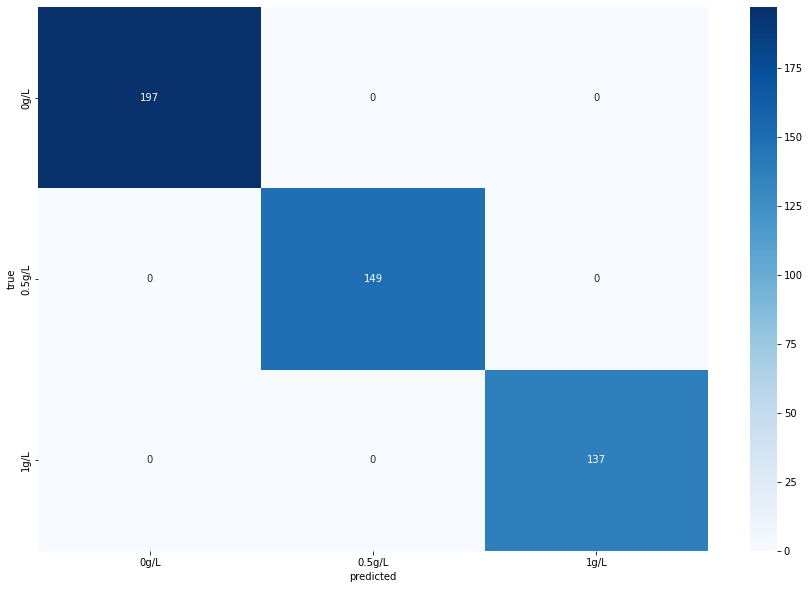

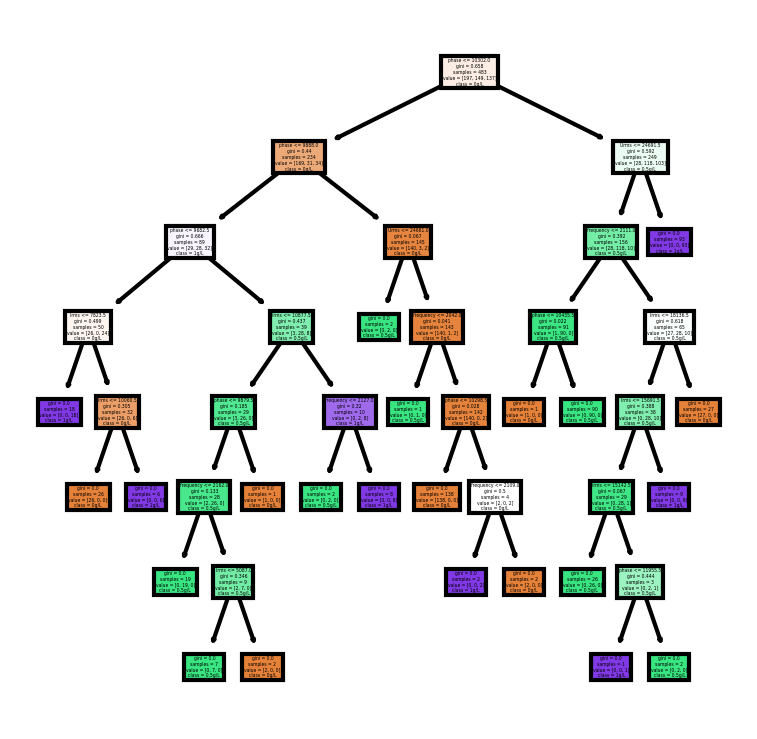

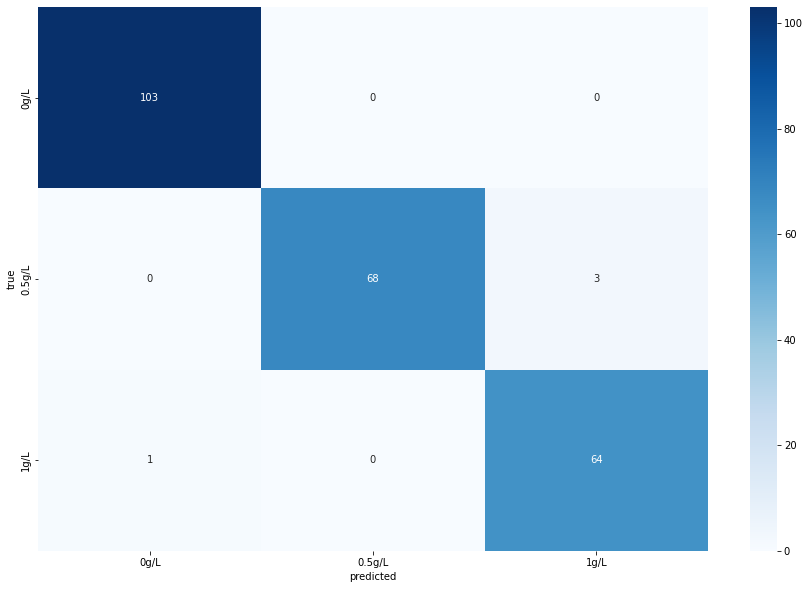

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33, random_state=random_state)
classifier = tree.DecisionTreeClassifier(
    # max_leaf_nodes=11,
    max_depth=10,
    random_state=0
)
classifier.fit(x_train, y_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

y_train_predicted = classifier.predict(x_train)
y_test_predicted = classifier.predict(x_test)
print(np.unique(y_test_predicted))

accuracy = metrics.accuracy_score(y_train, y_train_predicted)
print(f"Accuracy: {accuracy:.2f}")

cfm = confusion_matrix(y_train, y_train_predicted)
print('Confusion Matrix: \n', cfm)
print(classification_report(y_train, y_train_predicted, target_names=categories))

plt.subplots(figsize=(15,10))
sns.heatmap(cfm, annot=True, xticklabels=categories, yticklabels=categories, fmt='', cmap='Blues')
plt.xlabel("predicted") 
plt.ylabel("true")
plt.show()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3), dpi=300)
tree.plot_tree(classifier,
               feature_names = attributes, 
               class_names = categories,
               filled = True   
               )
plt.show()

cfm = confusion_matrix(y_test, y_test_predicted)
plt.subplots(figsize=(15,10))
sns.heatmap(cfm, annot=True, xticklabels=categories, yticklabels=categories, fmt='', cmap='Blues')
plt.xlabel("predicted") 
plt.ylabel("true")
plt.show()

# KNeighborsClassifier

In [30]:
df.shape

(722, 9)

In [16]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

In [17]:
random_state = 69 # arbitrarily number for randomization
attributes = ['Urms', 'Irms', 'phase', 'frequency'] # column names for input data
categories = ['0g/L', '0.5g/L', '1g/L'] # category names for classification

X = df[attributes] # input data frame from attributes
y = df['concentration'].apply(lambda x: str(x) + 'g/L') # category data from categories

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

In [18]:
n_neighbors = 15
print(f'''{'score_avg':<15}{'score_std':<15}{'object'}''')
for n in range(1, n_neighbors + 1):
    clf = KNeighborsClassifier(n_neighbors=n, weights='uniform')
    score = cross_val_score(clf, X, y, cv=kf, scoring="accuracy")
    print(f'''{score.mean():<15.3f}{score.std():<15.3f}{clf.__class__.__name__}({', '.join([f'{k}={v}' for k, v in clf.__dict__.items()])})''')

score_avg      score_std      object
0.996          0.009          KNeighborsClassifier(n_neighbors=1, radius=None, algorithm=auto, leaf_size=30, metric=minkowski, metric_params=None, p=2, n_jobs=None, weights=uniform)
0.994          0.007          KNeighborsClassifier(n_neighbors=2, radius=None, algorithm=auto, leaf_size=30, metric=minkowski, metric_params=None, p=2, n_jobs=None, weights=uniform)
0.990          0.012          KNeighborsClassifier(n_neighbors=3, radius=None, algorithm=auto, leaf_size=30, metric=minkowski, metric_params=None, p=2, n_jobs=None, weights=uniform)
0.990          0.009          KNeighborsClassifier(n_neighbors=4, radius=None, algorithm=auto, leaf_size=30, metric=minkowski, metric_params=None, p=2, n_jobs=None, weights=uniform)
0.986          0.015          KNeighborsClassifier(n_neighbors=5, radius=None, algorithm=auto, leaf_size=30, metric=minkowski, metric_params=None, p=2, n_jobs=None, weights=uniform)
0.975          0.016          KNeighborsClassifier(n_

In [19]:
n_neighbors = 15
print(f'''{'score_avg':<15}{'score_std':<15}{'object'}''')
for n in range(1, n_neighbors + 1):
    clf = KNeighborsClassifier(n_neighbors=n, weights='distance')
    score = cross_val_score(clf, X, y, cv=kf, scoring="accuracy")
    print(f'''{score.mean():<15.3f}{score.std():<15.3f}{clf.__class__.__name__}({', '.join([f'{k}={v}' for k, v in clf.__dict__.items()])})''')

score_avg      score_std      object
0.996          0.009          KNeighborsClassifier(n_neighbors=1, radius=None, algorithm=auto, leaf_size=30, metric=minkowski, metric_params=None, p=2, n_jobs=None, weights=distance)
0.996          0.009          KNeighborsClassifier(n_neighbors=2, radius=None, algorithm=auto, leaf_size=30, metric=minkowski, metric_params=None, p=2, n_jobs=None, weights=distance)
0.992          0.013          KNeighborsClassifier(n_neighbors=3, radius=None, algorithm=auto, leaf_size=30, metric=minkowski, metric_params=None, p=2, n_jobs=None, weights=distance)
0.992          0.009          KNeighborsClassifier(n_neighbors=4, radius=None, algorithm=auto, leaf_size=30, metric=minkowski, metric_params=None, p=2, n_jobs=None, weights=distance)
0.992          0.011          KNeighborsClassifier(n_neighbors=5, radius=None, algorithm=auto, leaf_size=30, metric=minkowski, metric_params=None, p=2, n_jobs=None, weights=distance)
0.988          0.012          KNeighborsClassifi

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

Accuracy: 1.00
Confusion Matrix: 
 [[197   0   0]
 [  0 149   0]
 [  0   0 137]]
              precision    recall  f1-score   support

        0g/L       1.00      1.00      1.00       197
      0.5g/L       1.00      1.00      1.00       149
        1g/L       1.00      1.00      1.00       137

    accuracy                           1.00       483
   macro avg       1.00      1.00      1.00       483
weighted avg       1.00      1.00      1.00       483



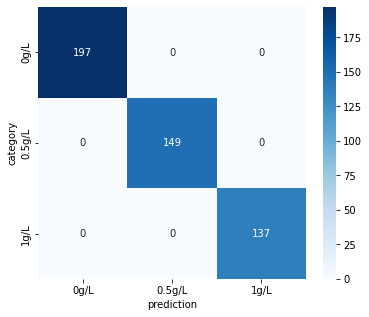

In [27]:
# This is madness in itself 
y_train_prediction = clf.predict(X_train)

accuracy = metrics.accuracy_score(y_train, y_train_prediction)
print(f"Accuracy: {accuracy:.2f}")

cfm = confusion_matrix(y_train, y_train_prediction)
print('Confusion Matrix: \n', cfm)
print(classification_report(y_train, y_train_prediction, target_names=categories))

plt.subplots(figsize=(6,5))
sns.heatmap(cfm, annot=True, xticklabels=categories, yticklabels=categories, fmt='', cmap='Blues')
plt.xlabel('prediction') 
plt.ylabel('category')
plt.show()

Accuracy: 1.00
Confusion Matrix: 
 [[103   0   0]
 [  0  71   0]
 [  0   0  65]]
              precision    recall  f1-score   support

        0g/L       1.00      1.00      1.00       103
      0.5g/L       1.00      1.00      1.00        71
        1g/L       1.00      1.00      1.00        65

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



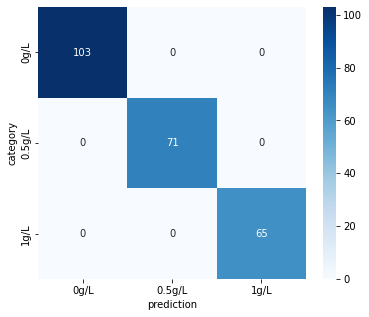

In [28]:
y_test_prediction = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_test_prediction)
print(f"Accuracy: {accuracy:.2f}")

cfm = confusion_matrix(y_test, y_test_prediction)
print('Confusion Matrix: \n', cfm)
print(classification_report(y_test, y_test_prediction, target_names=categories))

plt.subplots(figsize=(6,5))
sns.heatmap(cfm, annot=True, xticklabels=categories, yticklabels=categories, fmt='', cmap='Blues')
plt.xlabel('prediction') 
plt.ylabel('category')
plt.show()

In [49]:
random_state = None # arbitrarily number for randomization
attributes = ['Urms', 'Irms', 'phase', 'frequency'] # column names for input data
categories = ['0g/L', '0.5g/L', '1g/L'] # category names for classification

X = df[attributes] # input data frame from attributes
y = df['concentration'] # category data from categories

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

# kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train*2, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test*2, num_classes=3)
y_test.sum(axis=0)
y_train.sum(axis=0)

y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0

In [50]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=4))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
483/483 [==============================] - 0s 356us/step - loss: 0.9357 - accuracy: 0.5549
Epoch 2/20
483/483 [==============================] - 0s 343us/step - loss: 0.7407 - accuracy: 0.6832
Epoch 3/20
483/483 [==============================] - 0s 341us/step - loss: 0.6426 - accuracy: 0.7267
Epoch 4/20
483/483 [==============================] - 0s 333us/step - loss: 0.5787 - accuracy: 0.7785
Epoch 5/20
483/483 [==============================] - 0s 339us/step - loss: 0.5259 - accuracy: 0.7930
Epoch 6/20
483/483 [==============================] - 0s 341us/step - loss: 0.4761 - accuracy: 0.8095
Epoch 7/20
483/483 [==============================] - 0s 325us/step - loss: 0.4503 - accuracy: 0.8178
Epoch 8/20
483/483 [==============================] - 0s 327us/step - loss: 0.4213 - accuracy: 0.8323
Epoch 9/20
483/483 [==============================] - 0s 332us/step - loss: 0.3911 - accuracy: 0.8613
Epoch 10/20
483/483 [==============================] - 0s 322us/step - loss: 0.365

In [51]:
score = model.evaluate(X_test, y_test, batch_size=20)
score

12/12 [==============================] - 0s 406us/step - loss: 0.3356 - accuracy: 0.8745


[0.3355506360530853, 0.874476969242096]

In [52]:
model.metrics_names

['loss', 'accuracy']

In [53]:
y_test_prediction = model.predict(X_test)
y_test_prediction

array([[9.00347769e-01, 1.96285576e-01, 3.32589149e-02],
       [8.64537239e-01, 1.88305229e-01, 7.57557750e-02],
       [8.33241701e-01, 4.54715371e-01, 4.88185883e-03],
       [8.85229111e-02, 4.58044320e-01, 9.29927945e-01],
       [9.26561713e-01, 2.07627773e-01, 1.25496387e-02],
       [9.48960602e-01, 2.40640968e-01, 2.77486444e-03],
       [1.28818095e-01, 8.40475261e-02, 9.81290519e-01],
       [6.00063562e-01, 8.59841406e-01, 2.08819121e-01],
       [8.70432377e-01, 1.90619409e-01, 6.88686371e-02],
       [6.21685863e-01, 3.65911901e-01, 7.77285993e-02],
       [8.45164061e-04, 9.99949157e-01, 1.63609415e-01],
       [1.93127990e-03, 9.99804020e-01, 2.55196095e-01],
       [8.98425221e-01, 2.02490509e-01, 3.14981937e-02],
       [2.73638070e-02, 9.73196983e-01, 1.94960594e-01],
       [9.27246034e-01, 2.06361473e-01, 1.25111043e-02],
       [1.36131048e-03, 9.99897003e-01, 2.44765818e-01],
       [6.21759951e-01, 3.65544021e-01, 7.75507390e-02],
       [1.45602882e-01, 3.90922

In [54]:
np.apply_along_axis(lambda x: x.argmax(), axis=1, arr=y_test_prediction)

array([0, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 1,
       2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2,
       0, 1, 0, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0,
       2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0,
       0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1])

Confusion Matrix: 
 [[95  9  0]
 [14 59  0]
 [ 7  0 55]]
              precision    recall  f1-score   support

        0g/L       0.82      0.91      0.86       104
      0.5g/L       0.87      0.81      0.84        73
        1g/L       1.00      0.89      0.94        62

    accuracy                           0.87       239
   macro avg       0.90      0.87      0.88       239
weighted avg       0.88      0.87      0.88       239



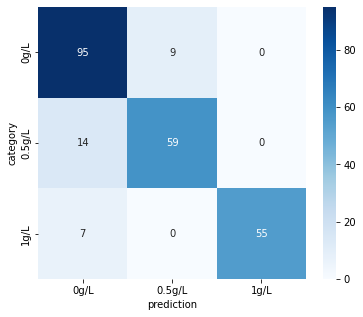

In [55]:


cfm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_test_prediction, axis=1))
print('Confusion Matrix: \n', cfm)
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_test_prediction, axis=1), target_names=categories))

plt.subplots(figsize=(6,5))
sns.heatmap(cfm, annot=True, xticklabels=categories, yticklabels=categories, fmt='', cmap='Blues')
plt.xlabel('prediction') 
plt.ylabel('category')
plt.show()

array([173.,  66.,   0.], dtype=float32)